# News Category Prediction
#### Chintan Chitroda

From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. 

In this Projec, We are going to use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

# FEATURES:

### STORY:  A part of the main content of the article to be published as a piece of news.
### SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

## Note:
#### The Final Prediction Output file is generated using LightGBM model named 'News_Predicted.csv'.

### Importing Required Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm

In [2]:
train = pd.read_csv('TrainDataset.csv')
test = pd.read_csv('TestDataset.csv')

In [3]:
print('Train Dataset contain',train.shape[0],'rows &',train.shape[1],'columns.')
print('Test Dataset contain',test.shape[0],'rows &',test.shape[1],'columns.')

Train Dataset contain 6102 rows & 2 columns.
Test Dataset contain 1526 rows & 1 columns.


In [4]:
train.head()

,STORY,SECTION
0,The roadshow and the filing of nomination pape...,0
1,These vulnerabilities could have allowed hacke...,1
2,"""People will now be able to include music in t...",1
3,Jersey is expected to have a good start at the...,2
4,Xiaomi’s unveiling also hints at how Samsung i...,1


In [5]:
test.head()

,STORY
0,Privileged to have done this candid and COMPLE...
1,6) Some analysts expect volatility to remain h...
2,There is no stopping Marvel Cinematic Universe...
3,"According to Ravi Menon, analyst at Elara Secu..."
4,"A complaint against Nadiadwala, known for prod..."


In [6]:
### Making a copy of original dataframe
trainCopy = train
testCopy = test

## Removing Stop Words, Punctuations & Getting lowercases

In [7]:
from textblob import TextBlob ### For Sentiment Polarity
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string

In [8]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc =  ' '.join([word for word in nopunc.split() if word.lower() not in stop_words])
    return str(TextBlob(nopunc)).lower()

In [9]:
joined = pd.DataFrame()
joined['STORY'] = train['STORY'].append(test['STORY'])

In [10]:
joined.replace("[^a-zA-Z]"," ",regex=True,inplace=True) ### REMOVEING REGULAR EXPRESSION

In [11]:
joined['STORY'] = joined.STORY.apply(text_process) ## REMOVING PUCTUATION AND STOP WORDS AND LOWERING WORDS

### Lemmatization

In [12]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [13]:
story = []
for i in joined.STORY:
    story.append(i)

In [14]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [15]:
new_sentence = []
for i in tqdm(range(len(story))):
    words = nltk.word_tokenize(story[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    new_sentence.append(' '.join(words))
    
    ## just checking result with both, Using Lemmatization as it is good.
    #for word in words:
        #print(word,"---to setm-------->",stemmer.stem(word))
        #print(word,'---to lematize---->',lemmatizer.lemmatize(word))

In [16]:
train.STORY[1] ## Original 

'These vulnerabilities could have allowed hackers to access sensitive information and take control over a number of smart home devices on the platform like door locks, security cameras and thermostats\n\n\nNEW DELHI: In September 2016, a major part of the internet on the east coast of the US went on the blink following the biggest cyber attack in the history of the internet. Now we know that it was the Mirai malware that triggered this internet of things (IoT) botnet attack that took down big websites including Twitter, The Guardian, Netflix, Reddit, and CNN. Two years later in July, Cisco Talos found several vulnerabilities in the firmware of Samsung’s SmartThings Hub platform for its IOT devices.\n\n\nThese vulnerabilities could have allowed hackers to access sensitive information and take control over a number of smart home devices on the platform like door locks, security cameras and thermostats. These devices can be found on Shodan, a search engine for IoT devices and then using N

In [17]:
new_sentence[1] ## After Processing

'vulnerability could allowed hacker access sensitive information take control number smart home device platform like door lock security camera thermostat new delhi september major part internet east coast u went blink following biggest cyber attack history internet know mirai malware triggered internet thing iot botnet attack took big website including twitter guardian netflix reddit cnn two year later july cisco talos found several vulnerability firmware samsung smartthings hub platform iot device vulnerability could allowed hacker access sensitive information take control number smart home device platform like door lock security camera thermostat device found shodan search engine iot device using nmap scan hacker identify one open port whose ip address visible online'

#### we could see a Big Difference after removing Stop Words and Punctuation and appliying Lemmatization

# TFIDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer() 
data = tfid.fit_transform(new_sentence).toarray()

In [19]:
tfid = TfidfVectorizer() 

In [20]:
data = tfid.fit_transform(new_sentence).toarray()

## Spliting data original Test and Train

In [21]:
train1 = data[:6102]
test = data[-1526:]

## Making ML Models

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [23]:
X = train1             ## Passing out TFID Train output to Train
y = train[['SECTION']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [25]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=12, random_state=101,
                             class_weight='balanced',verbose=1,n_jobs=-1)

In [26]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=101, verbose=1, warm_start=False)

In [27]:
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [28]:
print("F1 Score :",f1_score(y_pred,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

F1 Score : 0.9037796957618115
Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       397
           1       0.97      0.85      0.91       693
           2       0.78      0.97      0.87       422
           3       0.92      0.91      0.91       319

    accuracy                           0.90      1831
   macro avg       0.91      0.91      0.91      1831
weighted avg       0.91      0.90      0.91      1831

Confusion Matrix: 
 [[366   9  21   1]
 [ 10 591  70  22]
 [  4   5 411   2]
 [  2   6  22 289]]


### Predicting Test

In [29]:
y_pred = rfc.predict(test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [30]:
pd.Series(y_pred).value_counts()

1    493
2    471
0    335
3    227
dtype: int64

## Light GBM

In [31]:
import lightgbm as lgb

In [32]:
y_train = y_train.values

In [33]:
model = lgb.LGBMClassifier(n_estimators=400,random_state=42)
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=1)

In [34]:
y_pred = model.predict(X_test)

In [35]:
print("F1 Score :",f1_score(y_pred,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

F1 Score : 0.950732334452485
Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       397
           1       0.97      0.94      0.95       693
           2       0.91      0.98      0.94       422
           3       0.96      0.95      0.96       319

    accuracy                           0.95      1831
   macro avg       0.95      0.95      0.95      1831
weighted avg       0.95      0.95      0.95      1831

Confusion Matrix: 
 [[377   9   9   2]
 [ 10 649  26   8]
 [  4   5 412   1]
 [  3   6   7 303]]


In [36]:
import matplotlib.pyplot as plt

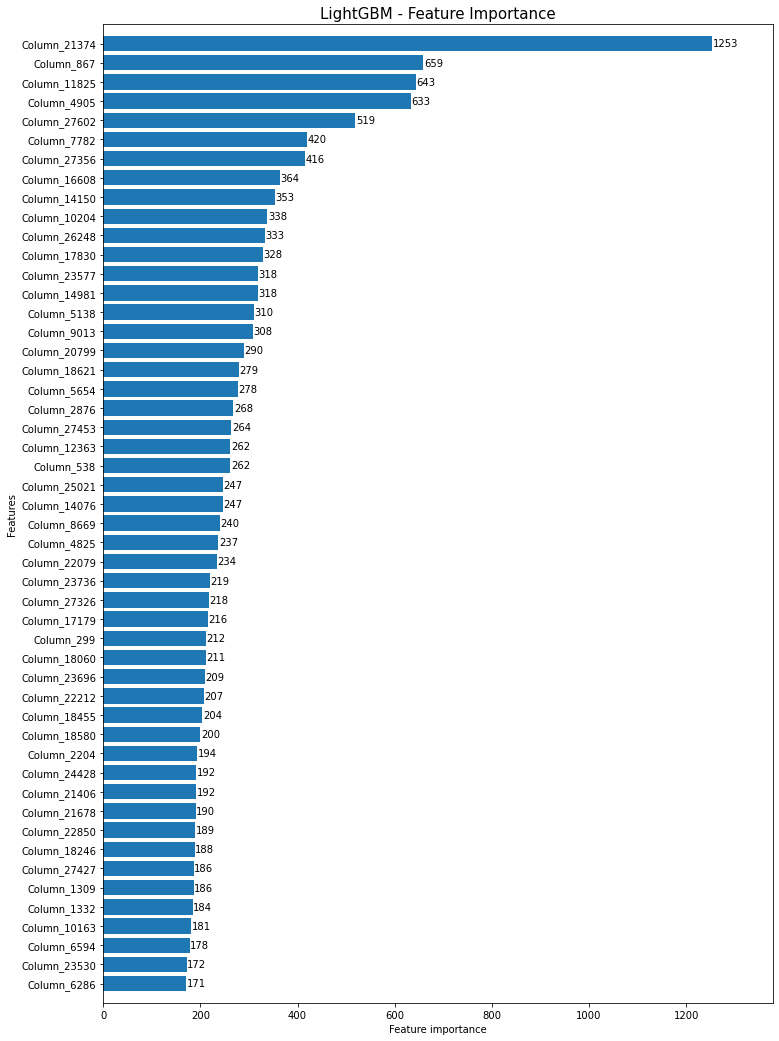

In [37]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

### Performing Cross Validation on Both Models

In [38]:
from sklearn.model_selection import cross_val_score

In [92]:
score1 = cross_val_score(rfc, X, y, scoring='accuracy',n_jobs=-1, cv=3)
print('### Random Forest Classifier ###')
print('Cross-validation mean accuracy >>',round(np.mean(score1),5) * 100)
print('Cross-Validation scores',score1)

### Random Forest Classifier ###
Cross-validation mean accuracy >> 90.642
Cross-Validation scores [0.91007371 0.91494592 0.89424496]


In [93]:
score2 = cross_val_score(model, X, y, scoring='accuracy',cv=3)
print('### Light GBM Classifier ###')
print('Cross-validation mean accuracy >>',round(np.mean(score2),5) * 100)
print('Cross-Validation scores',score2)

### Light GBM Classifier ###
Cross-validation mean accuracy >> 94.854
Cross-Validation scores [0.95577396 0.94690265 0.94294147]


###### We see the Performance of Light GBM is better than Random Forest based on metrics like F1 score and Cross validation.

###### We can conclude that LightGBM performs better in this case.

## Predicting test.csv file with Light GBM MODEL

In [39]:
sol = model.predict(test)

In [40]:
solution = pd.DataFrame()
solution['SECTION']=sol

In [41]:
solution.head(5)

,SECTION
0,2
1,3
2,2
3,1
4,2


## Cross Checking
#### Cross Checking with Test Copy we made at beginning.
* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

In [42]:
### Taking first 4 records.
solution.head(4)

,SECTION
0,2
1,3
2,2
3,1


In [43]:
### Predicted as Politics (0) and by reading we can say its actually Political news.
testCopy.STORY[0] 

'Privileged to have done this candid and COMPLETELY NON POLITICAL freewheeling conversation with our PM @narendramodi,” Kumar wrote on the microblogging site\n\n\nModi replied to the tweet, saying, “Dear @akshaykumar, it was good talking to you about everything, except politics and elections :) I’m sure people would like watching our conversation'

In [44]:
### Predicted as Business (3) and by reading we can say its actually Business news.
testCopy.STORY[1] 

'6) Some analysts expect volatility to remain high in the near term. Sahaj Agrawal, head of research for derivatives at Kotak Securities, said: "After a strong rally seen in the recent past, Nifty currently is in a consolidation phase. Tech parameters suggest possibility of extended consolidation before the upmove resumes. We continue to believe the bias remains positive."\n\n\n7) On the downside, Nifty has strong support at 11,200-11300, said Sahaj Agrawal of Kotak Securities. "On the higher side we would expect 12300-12500 on Nifty. Banking is expected to witness some profit-booking," he said.\n\n\n8) Banking shares today saw some profit-taking after outperforming in the recent rally. The index for banking stocks, Nifty Bank, today ended 0.90% lower, with PNB, Yes Bank, ICICI Bank and SBI among top losers.'

In [45]:
### Predicted as Entertainment (2) and by reading we can say its actually Entertainment news
testCopy.STORY[2] 

'There is no stopping Marvel Cinematic Universe’s latest offering Avengers: Endgame, as far as box office figures are concerned\n\n\n It was supposed to open somewhere between 260 million dollars and 300 million dollars in Canada and the US'

In [46]:
### Predicted as Technology (1) and by reading we can say its actually Technology news
testCopy.STORY[3] 

'According to Ravi Menon, analyst at Elara Securities (India) Pvt. Ltd, two factors are driving the broadband subscriber base. One is the bundled plans. The second is the network effect where growing usage of internet applications (such as apps) pulls in more users.\n\n\nThis works well for the telecom industry, as bundled packages are generally priced higher than plain vanilla voice plans. But encouraging high data usage also entails high capex, which is why all telcos have been burning a lot of cash. Unless tariffs rise from current levels, the situation is unlikely to improve.'

#### So after cross checking, we can say the model is performing Good on Test data set as well.

###### Making csv file for test prediction

In [47]:
solution.to_csv('News_Predicted.csv',index=False)

### Thank you ;)